# Replicating `spa_notes/Points`

# Data

* Import libraries required

In [1]:
# All things spatial data
library(sf)
# Pretty charts
library(ggplot2)

Linking to GEOS 3.4.2, GDAL 2.1.2, proj.4 4.9.1


* Read file:

In [2]:
db <- st_read('house_transactions/liv_house_trans.shp')

Reading layer `liv_house_trans' from data source `/Users/dani/spa_notes/house_transactions/liv_house_trans.shp' using driver `ESRI Shapefile'
Simple feature collection with 6324 features and 18 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: 333536 ymin: 382684 xmax: 345449 ymax: 397833
epsg (SRID):    NA
proj4string:    +proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +datum=OSGB36 +units=m +no_defs


* Parse dates

In [3]:
# Format dates
dts <- as.Date(db$trans_date)
# Set up summary table
tab <- summary(dts)
tab

Warning message in strptime(xx, f <- "%Y-%m-%d", tz = "GMT"):
“unknown timezone 'zone/tz/2018c.1.0/zoneinfo/Europe/London'”

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2014-01-02" "2014-04-11" "2014-07-09" "2014-07-08" "2014-10-03" "2014-12-30"

* Summary

In [4]:
summary(db)

      pcds                                           id      
 L1 6LS : 126   {00029226-80EF-4280-9809-109B8509656A}:   1  
 L8 5TE :  63   {00041BD2-4A07-4D41-A5AE-6459CD5FD37C}:   1  
 L1 5AQ :  34   {0005AE67-9150-41D4-8D56-6BFC868EECA3}:   1  
 L24 1WA:  31   {00183CD7-EE48-434B-8A1A-C94B30A93691}:   1  
 L17 6BT:  26   {003EA3A5-F804-458D-A66F-447E27569456}:   1  
 L3 1EE :  24   {00411304-DD5B-4F11-9748-93789D6A000E}:   1  
 (Other):6020   (Other)                               :6318  
     price                     trans_date   type     new      duration
 Min.   :    1000   2014-06-27 00:00: 109   D: 505   N:5495   F:3927  
 1st Qu.:   70000   2014-12-19 00:00: 109   F:1371   Y: 829   L:2397  
 Median :  110000   2014-02-28 00:00: 105   O: 119                    
 Mean   :  144310   2014-10-31 00:00:  95   S:1478                    
 3rd Qu.:  160000   2014-03-28 00:00:  94   T:2851                    
 Max.   :26615720   2014-11-28 00:00:  94                             
       

In [5]:
colnames(db)

[1] "pcds"       "id"         "price"      "trans_date" "type"      
 [6] "new"        "duration"   "paon"       "saon"       "street"    
[11] "locality"   "town"       "district"   "county"     "ppd_cat"   
[16] "status"     "lsoa11"     "LSOA11CD"   "geometry"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


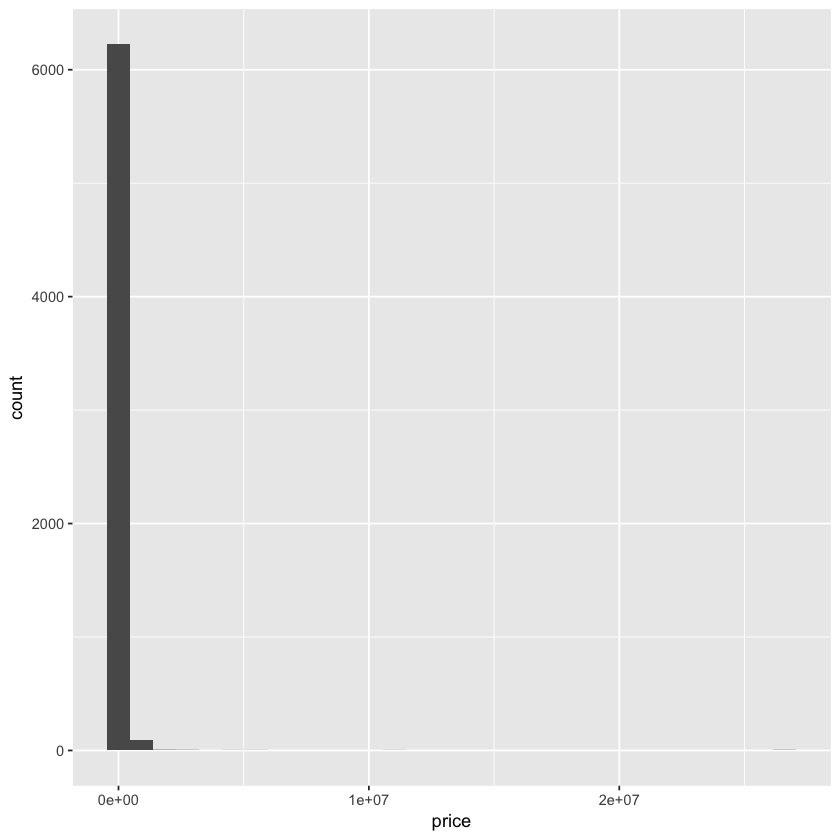

In [6]:
# Create the histogram
hist <- qplot(data=db,x=price)
hist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


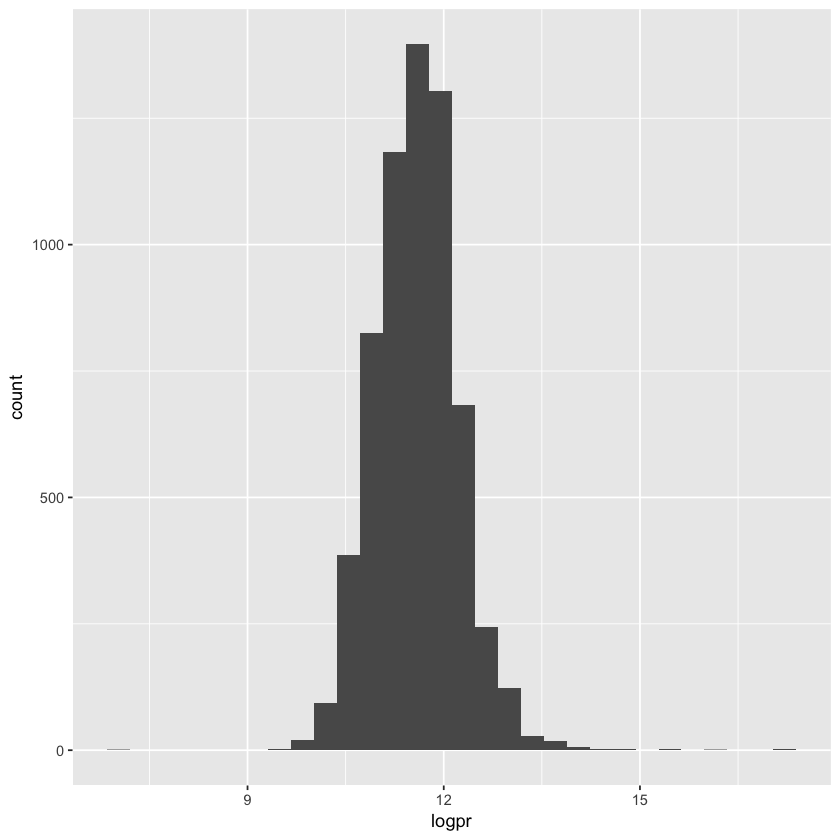

In [7]:
# Create log and add it to the table
logpr <- log(db$price)
db['logpr'] <- logpr
# Create the histogram
hist <- qplot(x=logpr)
hist

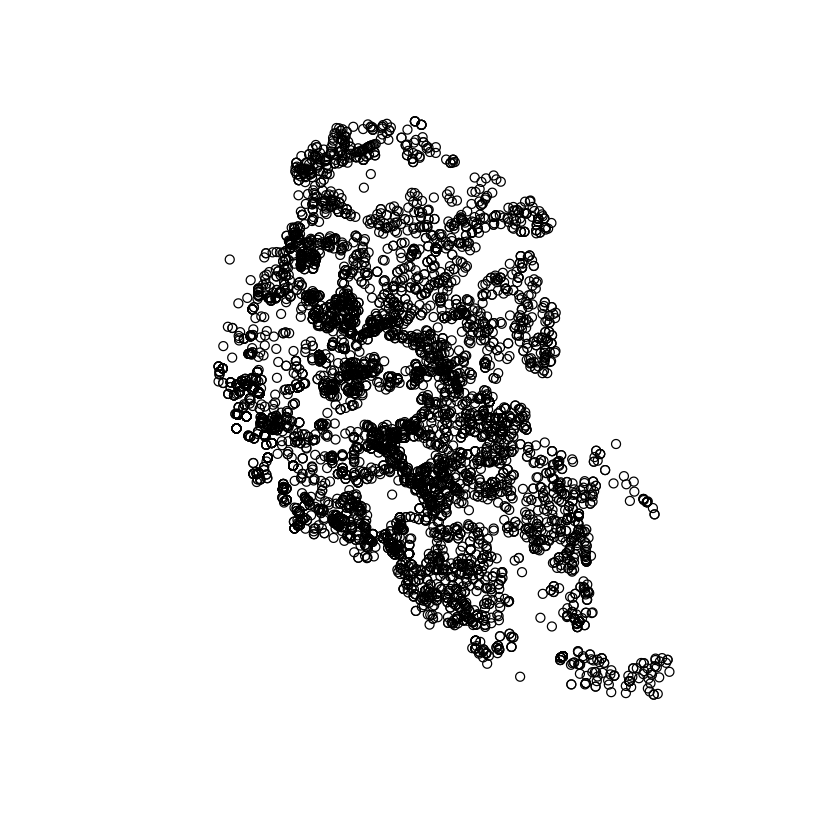

In [8]:
plot(st_geometry(db))

# KDE

## One-dimensional KDE

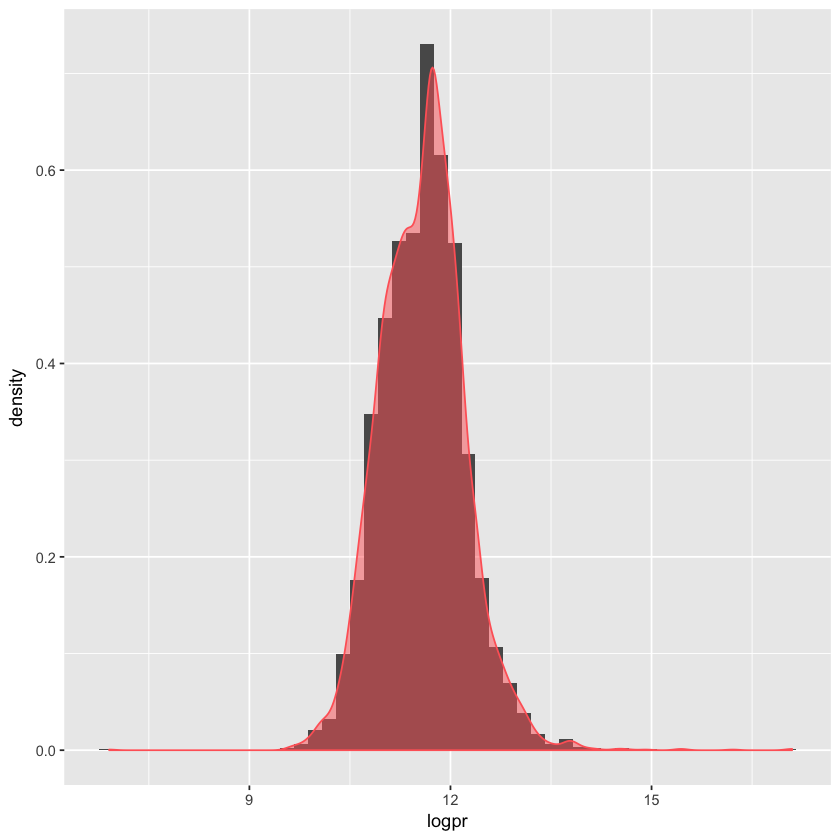

In [9]:
# Create the base
base <- ggplot(db, aes(x=logpr))
# Histogram
hist <- base + 
  geom_histogram(bins=50, aes(y=..density..))
# Overlay density plot
kde <- hist + 
  geom_density(fill="#FF6666", alpha=0.5, colour="#FF6666")
kde

## Two-dimensional (spatial) KDE